# Example BIU Usage

In [1]:
where = '/exports/molepi/tgehrmann/data/'
import biu as biu
import matplotlib.pylab as plt

List the available datasets

In [2]:
biu.db.list()

CADD:
Available versions:
 * GRCh37

ClinVar:
Available versions:
 * GRCh37
 * GRCh38

GnomAD
Available versions:
 * GRCh37

Genomes:
Available genomes:
 * GRCh37


## Open a genome object and load the GFF file

Load the genome, and get the GFF file and parse it

In [3]:
hg = biu.db.Genome("GRCh37", where="%s/hg19" % where)
print(hg)

Genome object
 Where: /exports/molepi/tgehrmann/data/hg19
 Genome : GRCh37
 Files:
  * [X] gff : /exports/molepi/tgehrmann/data/hg19/genome.gff3
  * [ ] cds : /exports/molepi/tgehrmann/data/hg19/genome.fa
  * [ ] chr_1 : /exports/molepi/tgehrmann/data/hg19/chr1.fa.gz
  * [ ] chr_2 : /exports/molepi/tgehrmann/data/hg19/chr2.fa.gz
  * [ ] chr_3 : /exports/molepi/tgehrmann/data/hg19/chr3.fa.gz
  * [ ] chr_4 : /exports/molepi/tgehrmann/data/hg19/chr4.fa.gz
  * [ ] chr_5 : /exports/molepi/tgehrmann/data/hg19/chr5.fa.gz
  * [ ] chr_6 : /exports/molepi/tgehrmann/data/hg19/chr6.fa.gz
  * [ ] chr_7 : /exports/molepi/tgehrmann/data/hg19/chr7.fa.gz
  * [ ] chr_8 : /exports/molepi/tgehrmann/data/hg19/chr8.fa.gz
  * [ ] chr_9 : /exports/molepi/tgehrmann/data/hg19/chr9.fa.gz
  * [ ] chr_10 : /exports/molepi/tgehrmann/data/hg19/chr10.fa.gz
  * [ ] chr_11 : /exports/molepi/tgehrmann/data/hg19/chr11.fa.gz
  * [ ] chr_12 : /exports/molepi/tgehrmann/data/hg19/chr12.fa.gz
  * [ ] chr_13 : /exports/molepi/

In [4]:
#download(["gff"]) #(optional, will be done automatically, unless downloadOnDemand=False)
print(hg.getGFF())

GFF3 object
 Where: /exports/molepi/tgehrmann/data/hg19/genome.gff3
 Entries: 2626677
 Top level statistics:
  * chromosome : 25
  * pseudogene : 13985
  * lincRNA_gene : 7109
  * gene : 26998
  * processed_transcript : 514
  * snRNA_gene : 1923
  * miRNA_gene : 3111
  * RNA : 2038
  * snoRNA_gene : 1459
  * rRNA_gene : 533
  * V_gene_segment : 97
  * J_gene_segment : 74
  * C_gene_segment : 5
  * VD_gene_segment : 37
  * supercontig : 59
  * mt_gene : 22



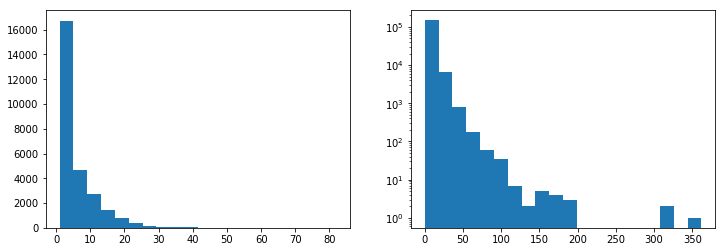

In [5]:
nTranscriptsPerGene = []
nExonsPerTranscript = []
for gene in hg.getGFF().topLevel['gene']:
    transcripts = [ cid for (i, cid) in hg.getGFF().index[gene][1] ]
    nTranscriptsPerGene.append(len(transcripts))
    for trans in transcripts:
        nExonsPerTranscript.append(len(hg.getGFF().index[trans][1]))
    #efor
#efor

fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()
axes[0].hist(nTranscriptsPerGene, bins=20)
axes[1].hist(nExonsPerTranscript, bins=20, log=True)
plt.show()

## Access the ClinVar database

In [6]:
cv = biu.db.ClinVar("GRCh37", where='%s/clinVar' % where)
print(cv)

ClinVar object
 Where: /exports/molepi/tgehrmann/data/clinVar
 Version: GRCh37
 Objects:
  * [ ] _vcfSource
  * [ ] _summarySource
 
 Files:
  * [X] vcf : /exports/molepi/tgehrmann/data/clinVar/clinVar.vcf.bgz
  * [X] vcf_tbi : /exports/molepi/tgehrmann/data/clinVar/clinVar.vcf.bgz.tbi
  * [X] sum : /exports/molepi/tgehrmann/data/clinVar/summary.tsv.bgz
  * [X] sum_tbi : /exports/molepi/tgehrmann/data/clinVar/summary.tsv.bgz.tbi



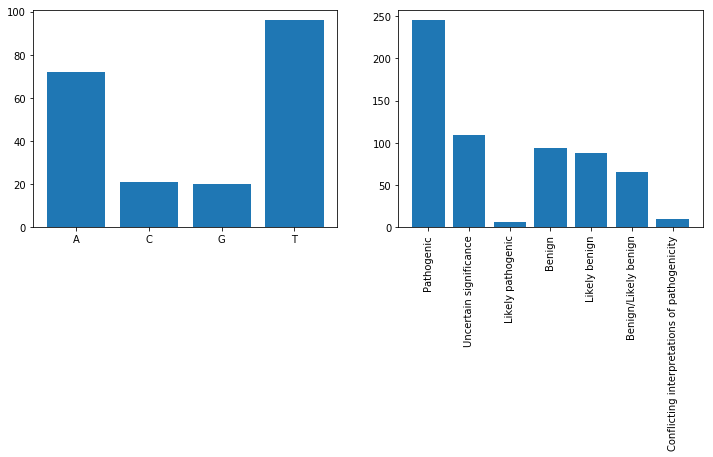

In [7]:
alts = { n : 0 for n in 'ACGT'}
for record in cv.queryVCF(1, 949422, 1049422):
    for alt in record.ALT:
        alt = alt.sequence
        if alt in alts:
            alts[alt] += 1

cImpact = {}
for record in cv.querySummary(1, 949422, 1049422):
    if record.clinicalsignificance not in cImpact:
        cImpact[record.clinicalsignificance] = 0
    cImpact[record.clinicalsignificance] += 1

fig, axes = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
axes = axes.flatten()

nbars = axes[0].bar([1,2,3,4], alts.values(), tick_label=list(alts.keys()))

nbars = axes[1].bar([ x + 1 for x in range(len(cImpact.keys())) ], cImpact.values(), tick_label=list(cImpact.keys()))
plt.xticks(rotation=90)
plt.show()

## Access the CADD database

In [8]:
cadd = biu.db.CADD(where="%s/cadd" % where,
                   localCopy = {"tsv" : "/exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz", 
                                "tsv_tbi" : "/exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz.tbi"})
print(cadd)

Same symbolic link already exists for 'tsv'
Same symbolic link already exists for 'tsv_tbi'
CADD object
 Where: /exports/molepi/tgehrmann/data/cadd/GRCh37
 Version: GRCh37
 Objects:
  * [ ] _source
 
 Files:
  * [S] tsv : /exports/molepi/tgehrmann/data/cadd/GRCh37/cadd.tsv.bgz -> /exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz
  * [S] tsv_tbi : /exports/molepi/tgehrmann/data/cadd/GRCh37/cadd.tsv.bgz.tbi -> /exports/molepi/tgehrmann/GAVIN-reimp/CADD/cadd.tsv.bgz.tbi



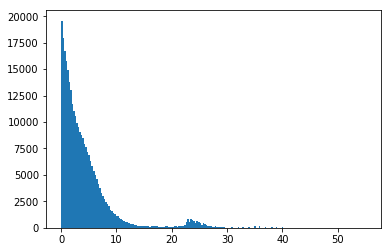

In [9]:
plt.hist([ float(p) for p in cadd.query(1, 949422, 1049422).values() ], bins=200)
plt.show()

## Access the GnomAD database

In [10]:
gnomad = biu.db.Gnomad(where = "%s/cadd" % where,
                       localCopy = { "vcf" : "/exports/molepi/tgehrmann/GAVIN-reimp/gnomAD/gnomad.vcf.bgz",
                                     "vcf_tbi" : "/exports/molepi/tgehrmann/GAVIN-reimp/gnomAD/gnomad.vcf.bgz.tbi"})
print(gnomad)

Same symbolic link already exists for 'vcf'
Same symbolic link already exists for 'vcf_tbi'
Gnomad object
 Where: /exports/molepi/tgehrmann/data/cadd
 Version: GRCh37
 Objects:
  * [ ] _vcfSource
  * [ ] _covSource
 
 Files:
  * [S] vcf : /exports/molepi/tgehrmann/data/cadd/gnomad.vcf.bgz -> /exports/molepi/tgehrmann/GAVIN-reimp/gnomAD/gnomad.vcf.bgz
  * [S] vcf_tbi : /exports/molepi/tgehrmann/data/cadd/gnomad.vcf.bgz.tbi -> /exports/molepi/tgehrmann/GAVIN-reimp/gnomAD/gnomad.vcf.bgz.tbi
  * [ ] chr_1_cov : /exports/molepi/tgehrmann/data/cadd/gnomad.coverage.chr.1.tsv.bgz
  * [ ] chr_1_cov_tbi : /exports/molepi/tgehrmann/data/cadd/gnomad.coverage.chr.1.tsv.bgz.tbi
  * [ ] chr_2_cov : /exports/molepi/tgehrmann/data/cadd/gnomad.coverage.chr.2.tsv.bgz
  * [ ] chr_2_cov_tbi : /exports/molepi/tgehrmann/data/cadd/gnomad.coverage.chr.2.tsv.bgz.tbi
  * [ ] chr_3_cov : /exports/molepi/tgehrmann/data/cadd/gnomad.coverage.chr.3.tsv.bgz
  * [ ] chr_3_cov_tbi : /exports/molepi/tgehrmann/data/cadd/g

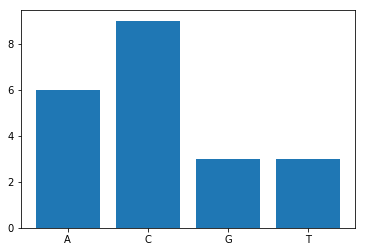

In [11]:
alts = { n : 0 for n in 'ACGT'}
for record in gnomad.queryVCF(1, 12590, 13000):
    for alt in record.ALT:
        alt = alt.sequence
        if alt in alts:
            alts[alt] += 1
nbars = plt.bar([1,2,3,4], alts.values(), tick_label=list(alts.keys()))